Fetching data from 

In [15]:
dataset = 'data-es'
base_url = f"https://equipements.sports.gouv.fr/api/explore/v2.1/catalog/datasets/{dataset}/records"
import requests

res = requests.get(
    url=base_url,
    params={
        'limit': -1,
    }
)
print('url : ', res.url)
print('res.headers : ', res.headers)
print('content : ', res.json())
import pandas as pd
d = dict(res.json())
data = pd.DataFrame(d['results'])

url :  https://equipements.sports.gouv.fr/api/explore/v2.1/catalog/datasets/data-es/records?limit=-1
res.headers :  {'Server': 'openresty', 'Date': 'Sun, 28 Jan 2024 22:59:19 GMT', 'Content-Type': 'application/json; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'X-RateLimit-Remaining': '4998', 'X-RateLimit-Limit': '5000', 'X-RateLimit-Reset': '2024-01-29 00:00:00+00:00', 'Cache-Control': 'no-cache, no-store, max-age=0, must-revalidate', 'Vary': 'Accept-Language, Cookie, Host', 'Content-Language': 'fr-fr', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Methods': 'POST, GET, OPTIONS', 'Access-Control-Max-Age': '1000', 'Access-Control-Allow-Headers': 'Authorization, X-Requested-With, Origin, ODS-API-Analytics-App, ODS-API-Analytics-Embed-Type, ODS-API-Analytics-Embed-Referrer, ODS-Widgets-Version, Accept', 'Access-Control-Expose-Headers': 'ODS-Explore-API-Deprecation, Link, X-RateLimit-Remaining, X-RateLimit-Limit, X-RateLimit-Reset, X-RateLimit-da

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 103 entries, numinstallation to coordonnees
dtypes: float64(15), object(88)
memory usage: 80.6+ KB


In [17]:
coords = pd.json_normalize(data.coordonnees)

In [18]:
coords

,lon,lat
0,3.654478,46.667870
1,3.654478,46.667870
2,2.474620,46.336780
3,3.155460,46.587370
4,3.154730,46.587580
...,...,...
95,2.603980,46.532320
96,2.602582,46.533042
97,2.604260,46.532010
98,3.386435,46.330907


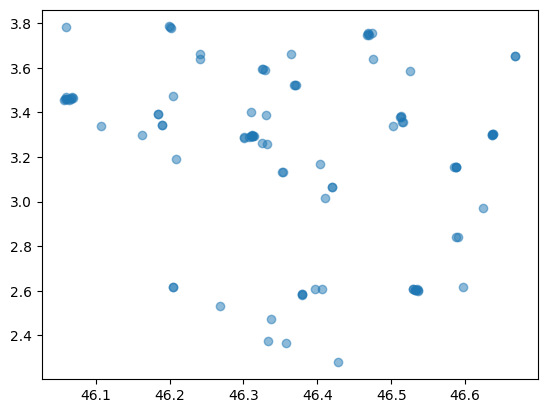

In [19]:
import matplotlib.pyplot as plt

plt.scatter(coords.lat, coords.lon, alpha=0.5)

In [20]:
import geopandas as gpd
import contextily as cx

d:\fichiers_pa\centrale\dataviz\infra_jo_viz\.venv\lib\site-packages\contextily\tile.py:620: UserWarning: The inferred zoom level of 26 is not valid for the current tile provider (valid zooms: 0 - 19).
  warnings.warn(msg)


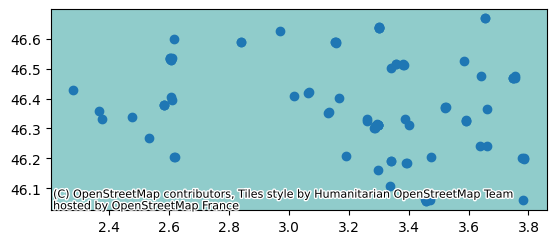

In [27]:
ax = gpd.GeoDataFrame(
    data=coords,
    geometry=gpd.points_from_xy(coords.lon, coords.lat)
).plot()
cx.add_basemap(ax)

d:\fichiers_pa\centrale\dataviz\infra_jo_viz\.venv\lib\site-packages\contextily\tile.py:620: UserWarning: The inferred zoom level of 26 is not valid for the current tile provider (valid zooms: 0 - 19).
  warnings.warn(msg)


<Figure size 640x480 with 0 Axes>